# Linear models
- Make simple random dataset
- Compute solution using least squares
- Evaluation solution

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

np.random.seed(42)

num_samples = 1000
num_features = 20
x = np.random.rand(num_samples, num_features)
x.shape

(1000, 20)

In [3]:
w = np.random.rand(num_features)
noise_sigma = 0.1

y = np.sum(x * w, axis=1) + noise_sigma * np.random.randn(num_samples)
# noise_sigma * np.random.randn(num_samples) -> noise, normal idst(0, 0.1)
y.shape

(1000,)

In [4]:
y[:10]

array([3.42955255, 4.64838826, 4.55644231, 4.15603682, 4.48277913,
       4.88655674, 4.78093454, 4.68176505, 4.36808404, 6.04269468])

In [5]:
w

array([0.72999831, 0.184512  , 0.34663969, 0.66328064, 0.48208934,
       0.73857104, 0.9612079 , 0.11654669, 0.70956772, 0.23034416,
       0.41447673, 0.03286273, 0.13590738, 0.31977729, 0.34198581,
       0.89958522, 0.74181291, 0.97218297, 0.59907151, 0.24171373])

In [6]:
x[:2, :]

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
        0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
        0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
        0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914],
       [0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
        0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041,
        0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
        0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249]])

In [7]:
x[0][0] * w[0]

0.2734136541565574

In [8]:
(x * w)[:2, :]

array([[0.27341365, 0.17541819, 0.25373816, 0.39707858, 0.07521492,
        0.11521303, 0.05583043, 0.10094996, 0.42653181, 0.16310038,
        0.00853179, 0.03187388, 0.1131351 , 0.06790123, 0.06218156,
        0.16498799, 0.22569082, 0.51015927, 0.25876595, 0.07039408],
       [0.44665158, 0.02573829, 0.10126893, 0.24300072, 0.21986648,
        0.57990823, 0.19192802, 0.05993232, 0.42035825, 0.01069958,
        0.2518132 , 0.00560389, 0.00884099, 0.30343204, 0.33023245,
        0.7272223 , 0.22596643, 0.09495517, 0.40990451, 0.1063909 ]])

### Compute solution using linear algebra

In [9]:
# solution: w_hat = inv(x_t * x) * x_t * y

x_t = np.transpose(x)
x_t_x = np.dot(x_t, x)
x_t_y = np.dot(x_t, y)
x_t_x_inv = np.linalg.inv(x_t_x)
w_hat = np.dot(x_t_x_inv, x_t_y)
# w_hat is a our solution
# it contains weights of the input features

### Prediction

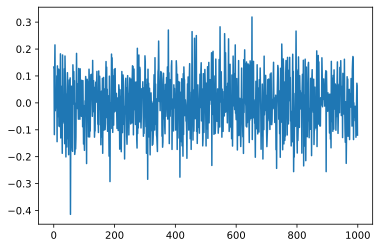

In [10]:
# prediction: x * w_hat
import matplotlib.pyplot as plt

y_hat = np.dot(x, w_hat)
plt.plot(y_hat - y)
plt.show()

In [11]:
np.mean(y_hat), np.mean(y)

(4.949178217006813, 4.9487596877777165)

In [12]:
np.std(y_hat), np.std(y)

(0.7227095737954341, 0.7322975720947649)

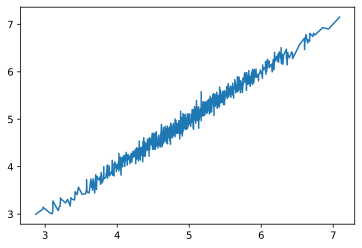

In [13]:
sort_idxs = np.argsort(y_hat)
plt.plot(y_hat[sort_idxs], y[sort_idxs])

### Evaluation

In [14]:
# mse, mae, r2
mse = np.mean((y - y_hat) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(abs(y - y_hat))
r2 = 1 - np.mean((y - y_hat) ** 2) / np.var(y)

mse, rmse, mae, r2

(0.009808029719357087,
 0.0990354972691968,
 0.0795501161311335,
 0.9817102998868765)

In [15]:
# ex 1.4.X: write a code and make a plot to see how MSE, RMSE and MAE depend on the amount of noise_sigma,
# when it changes from 0 to 1 with step 0.1.

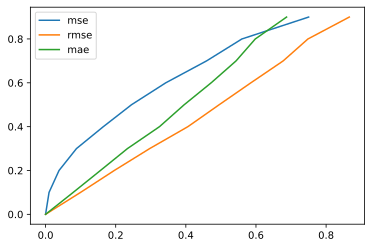

In [16]:
# ex

np.random.seed(42)

num_samples = 1000
num_features = 20
x = np.random.rand(num_samples, num_features)
w = np.random.rand(num_features)
noise_sigmas = np.arange(0, 1, 0.1)

mses = []
rmses = []
maes = []
for noise_sigma in noise_sigmas:
    y = np.sum(x * w, axis=1) + noise_sigma * np.random.randn(num_samples)
    
    x_t = np.transpose(x)
    x_t_x = np.dot(x_t, x)
    x_t_y = np.dot(x_t, y)
    x_t_x_inv = np.linalg.inv(x_t_x)
    w_hat = np.dot(x_t_x_inv, x_t_y)
    
    y_hat = np.dot(x, w_hat)
    
    mse = np.mean((y - y_hat) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(abs(y - y_hat))
    
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)
    
plt.plot(mses, noise_sigmas, label="mse")
plt.plot(rmses, noise_sigmas, label="rmse")
plt.plot(maes, noise_sigmas, label="mae")
plt.legend()
plt.show()

### Data normalization and denormalization

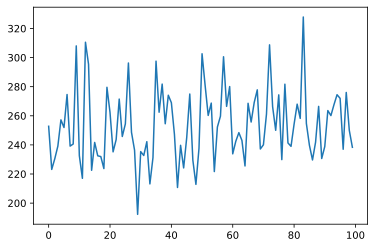

In [17]:
np.random.seed(42)

num_samples = 100
num_features = 20

xs = np.random.uniform(10, 50, size=(num_samples, num_features))
w = np.random.rand(num_features)
noise_sigma = 5
ys = np.sum(xs * w, axis=1) + noise_sigma * np.random.randn(num_samples)

plt.plot(ys)
plt.show()

In [18]:
import utils

w_hat = utils.solve(xs, ys)
y_hat = np.dot(xs, w_hat)

utils.mse(y_hat, ys), utils.r2(y_hat, ys)

(19.924180199614685, 0.9664114897822282)

In [19]:
y_hat[:5]

array([253.82751251, 220.79682835, 238.95158174, 245.65614607,
       252.51368945])

In [20]:
mean_xs, sd_xs = np.mean(xs, axis=0), np.std(xs, axis=0)
mean_y, sd_y = np.mean(ys), np.std(ys)

mean_xs, sd_xs, mean_y, sd_y

(array([29.76643377, 29.77963427, 28.66133205, 30.26511547, 30.78773536,
        30.64107442, 28.72881069, 30.74436511, 29.92090352, 29.5088536 ,
        28.73379376, 32.83648627, 30.55455704, 29.83009612, 29.23436594,
        31.21737215, 28.89162699, 29.24061365, 30.29536689, 29.27100634]),
 array([12.11663274, 12.01520448, 10.93498188, 10.66416346, 12.22824475,
        11.46861268, 11.41650502, 11.14490407, 12.07625988, 11.2645747 ,
        11.9959164 , 11.24961211, 11.89182427, 11.37602785, 12.21268932,
        12.00763685, 11.92352059, 10.9618247 , 12.28249456, 11.42685164]),
 253.44483292251388,
 24.627020577639954)

In [21]:
norm_xs = (xs - mean_xs) / sd_xs
norm_ys = (ys - mean_y) / sd_y

# sanity check: all means should be ~0, and standard deviations should be ~1
print(np.mean(norm_xs, axis=0), "\n", np.std(norm_xs, axis=0))
print(np.mean(norm_ys), "\n", np.std(norm_ys))

[-5.19584376e-16  8.37108161e-16  4.92557384e-16  7.76601006e-16
 -9.41469125e-16 -1.18127730e-15  3.54161145e-16 -8.40993941e-16
 -3.49165141e-16 -1.77635684e-16  7.77156117e-16 -6.21724894e-16
  7.93809463e-17 -4.86277685e-16  1.61870517e-15 -3.92463839e-16
 -1.95399252e-16  1.95399252e-16  1.33226763e-16 -9.29256672e-16] 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
8.737455203799982e-16 
 1.0


In [22]:
norm_w_hat = utils.solve(norm_xs, norm_ys)
norm_y_hat = np.dot(norm_xs, norm_w_hat)

y_hat = mean_y + norm_y_hat * sd_y  # denormalize, return to real scale

In [23]:
y_hat[:5]

array([253.92498595, 220.92084621, 239.07722618, 245.82570509,
       252.45380263])

In [24]:
max(ys), min(ys), max(norm_ys), min(norm_ys)

(327.8606011860324,
 192.29963117392856,
 3.0217121892156187,
 -2.4828501505416356)

In [25]:
max(y_hat), min(y_hat), max(norm_y_hat), min(norm_y_hat)

(320.2501153854198,
 197.72705424728554,
 2.7126822853902848,
 -2.2624652665380554)

In [26]:
utils.mse(y_hat, ys), utils.r2(y_hat, ys)

(19.894224933559748, 0.9660852993743549)

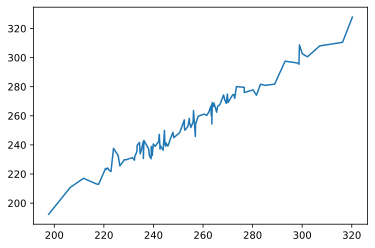

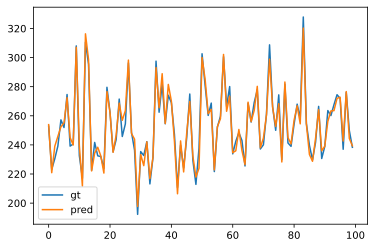

In [27]:
sort_idxs = np.argsort(y_hat)
plt.plot(y_hat[sort_idxs], ys[sort_idxs])

plt.figure()
plt.plot(ys, label="gt")
plt.plot(y_hat, label="pred")
plt.legend()

plt.show()